HEALTH INSURANCE COST MODEL

In [ ]:
#Loaind the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
p=pd.read_csv('insurance.csv')
df=pd.DataFrame(p)
df

In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
df.shape

(1338, 7)

In [5]:
df.size

9366

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
[features for features in df.dtypes[df.dtypes !="object"].index] 


['age', 'bmi', 'children', 'charges']

In [11]:
num_features=df.dtypes[df.dtypes!="object"].index
num_features

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [12]:
len(num_features)

4

In [13]:
df[num_features].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
cat_features=df.dtypes[df.dtypes=="object"].index
cat_features


Index(['sex', 'smoker', 'region'], dtype='object')

In [15]:
#check the unique values in the "sex" column
df["sex"].unique()


array(['female', 'male'], dtype=object)

In [16]:
#print the no.of lables of "sex" variables
print(df.sex.value_counts())


male      676
female    662
Name: sex, dtype: int64


In [17]:
#check the unique values in the "smoker" column
df["smoker"].unique()


array(['yes', 'no'], dtype=object)

In [18]:
#print the no.of lables of "smoker" variables
print(df.smoker.value_counts())


no     1064
yes     274
Name: smoker, dtype: int64


In [19]:
#check the unique va;ues in the "region" column
df["region"].unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
#print the no.of lables of "region" variables
print(df.region.value_counts())


southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


DATA CLEANING

In [21]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [22]:
#checking the null values
df.isnull()



,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [23]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

ANALYZING THROUGH DATA VISULIZATION

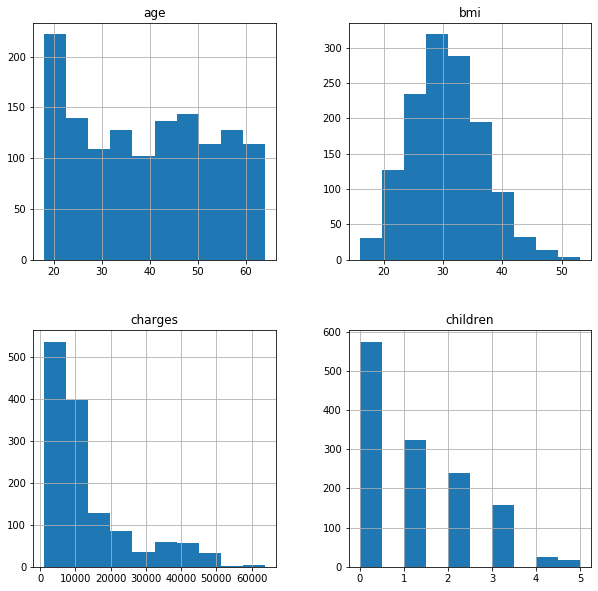

In [24]:
#histogram for each feature
df.hist(bins=10,figsize=(10,10))
plt.show()


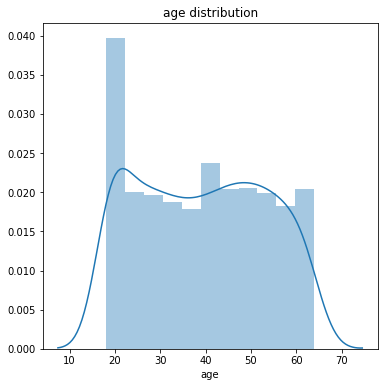

In [25]:
plt.figure(figsize=(6,6))
sns.distplot(df["age"])
plt.title("age distribution")
plt.show()


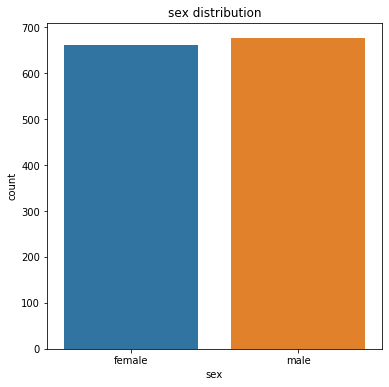

In [26]:
#distribution for gender columns
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=df)
plt.title("sex distribution")
plt.show()


In [27]:
print(df.sex.value_counts())

male      676
female    662
Name: sex, dtype: int64


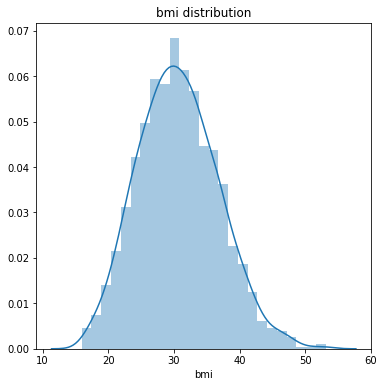

In [28]:
plt.figure(figsize=(6,6))
sns.distplot(df["bmi"])
plt.title("bmi distribution")
plt.show()


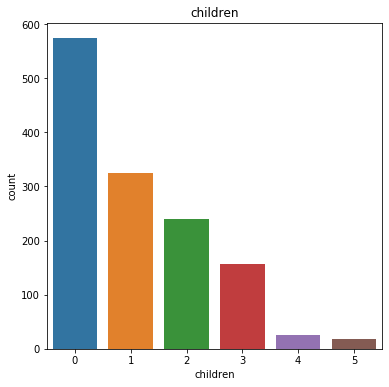

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x="children",data=df)
plt.title("children")
plt.show()


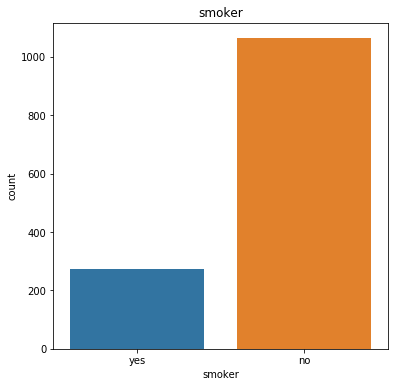

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(x="smoker",data=df)
plt.title("smoker")
plt.show()


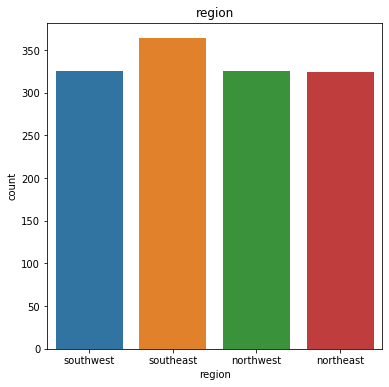

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(x="region",data=df)
plt.title("region")
plt.show()


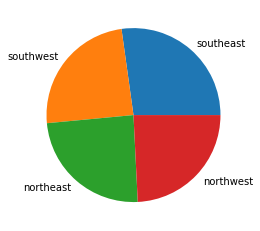

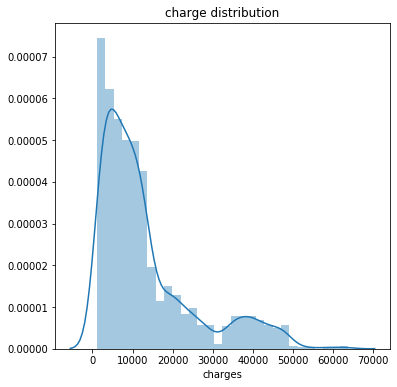

In [32]:
x=df["region"].value_counts()
names=["southeast","southwest","northeast","northwest"]
fig=plt.pie(x,labels=names)
#distibution of charges values
plt.figure(figsize=(6,6))
sns.distplot(df["charges"])
plt.title("charge distribution")
plt.show()


In [33]:
print(df.corr())

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


In [34]:
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [35]:
df.replace({"region":{"southeast":0,"southwest":1,"northeast":2,"northwest":3}},inplace=True)

In [36]:
df.replace({"sex":{"male":0,"female":1}},inplace=True)


In [37]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


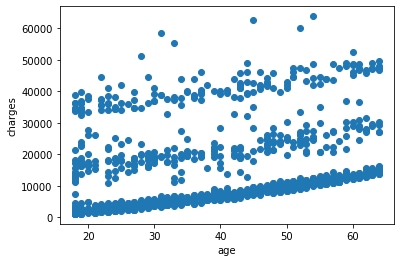

In [38]:
x=df["age"]
y=df["charges"]
plt.scatter(x,y)
plt.xlabel("age")
plt.ylabel("charges")
plt.show()


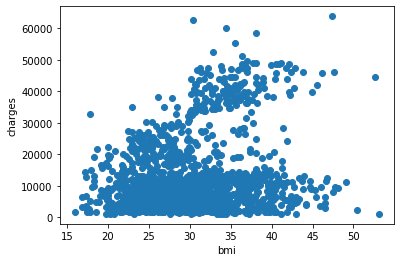

In [39]:
#checking the relationship between bmi and charges
x=df["bmi"]
y=df["charges"]
plt.scatter(x,y)
plt.xlabel("bmi")
plt.ylabel("charges")
plt.show()


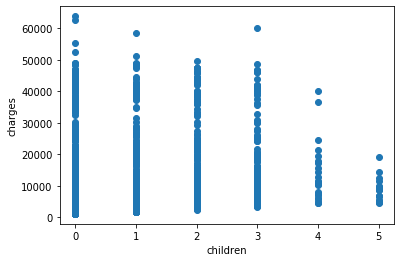

In [40]:
#checking the relationship between bmi and charges
x=df["children"]
y=df["charges"]
plt.scatter(x,y)
plt.xlabel("children")
plt.ylabel("charges")
plt.show()


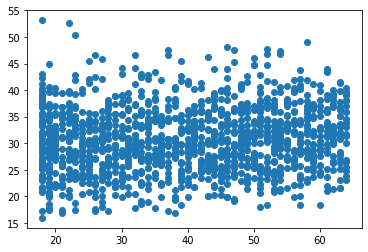

In [41]:
#checking the relatonship between the age and bmi columns
x=df["age"]
y=df["bmi"]
plt.scatter(x,y)
plt.show()


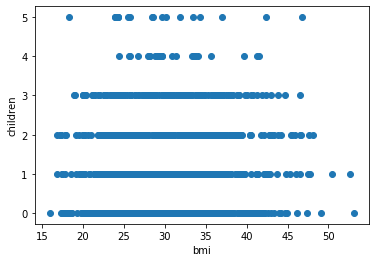

In [42]:
#relationship between the bmi and children columns
x=df["bmi"]
y=df["children"]
plt.xlabel("bmi")
plt.ylabel("children")
plt.scatter(x,y)
plt.show()


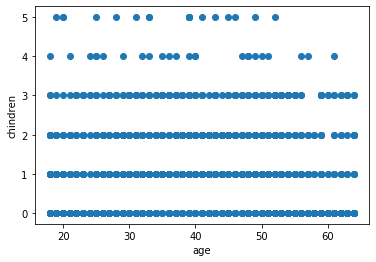

In [43]:
#relationship between the age and children columns
x=df["age"]
y=df["children"]
plt.xlabel("age")
plt.ylabel("chindren")
plt.scatter(x,y)
plt.show()


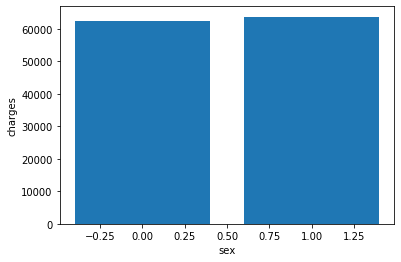

In [44]:
#barchart for the sex and charges
x=df["sex"]
y=df["charges"]
plt.xlabel("sex")
plt.ylabel("charges")
plt.bar(x,y)
plt.show()


<BarContainer object of 1338 artists>

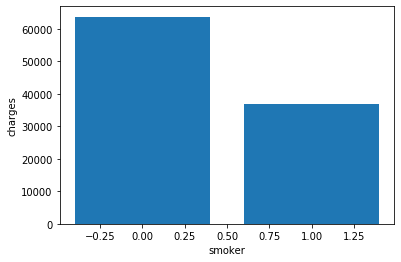

In [45]:
#barchart for the smoker and charges
x=df["smoker"]
y=df["charges"]
plt.xlabel("smoker")
plt.ylabel("charges")
plt.bar(x,y)


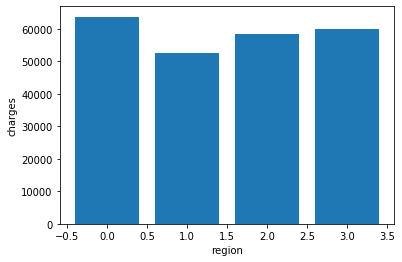

In [46]:
#barchart for the region and charges
x=df["region"]
y=df["charges"]
plt.xlabel("region")
plt.ylabel("charges")
plt.bar(x,y)
plt.show()


In [47]:
X=df.drop(columns="charges",axis=1)
X=df.drop(columns="children",axis=1)
Y=df["charges"]
print(Y)
print(X)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64
      age  sex     bmi  smoker  region      charges
0      19    1  27.900       0       1  16884.92400
1      18    0  33.770       1       0   1725.55230
2      28    0  33.000       1       0   4449.46200
3      33    0  22.705       1       3  21984.47061
4      32    0  28.880       1       3   3866.85520
...   ...  ...     ...     ...     ...          ...
1333   50    0  30.970       1       3  10600.54830
1334   18    1  31.920       1       2   2205.98080
1335   18    1  36.850       1       0   1629.83350
1336   21    1  25.800       1       1   2007.94500
1337   61    1  29.070       0       3  29141.36030

[1338 rows x 6 columns]


In [48]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.23,random_state=2)
print(X_train.shape)
print(X_test.shape)




(1030, 6)
(308, 6)


In [49]:
X_train


,age,sex,bmi,smoker,region,charges
109,63,0,35.090,0,0,47055.53210
1063,36,0,28.595,1,3,6548.19505
649,58,1,32.965,1,2,12430.95335
903,49,0,36.850,1,0,8125.78450
823,44,1,29.810,1,0,8219.20390
...,...,...,...,...,...,...
466,60,1,28.700,1,1,13224.69300
299,48,1,28.880,1,3,9249.49520
493,61,0,43.400,1,1,12574.04900
527,51,1,25.800,1,1,9861.02500


In [50]:
X_test


,age,sex,bmi,smoker,region,charges
17,23,0,23.845,1,2,2395.17155
1091,55,1,29.830,1,2,11286.53870
273,50,0,27.455,1,2,9617.66245
270,18,0,29.370,1,0,1719.43630
874,44,0,21.850,1,2,8891.13950
...,...,...,...,...,...,...
90,21,1,39.490,1,0,2026.97410
436,22,0,31.730,1,2,2254.79670
763,27,0,26.030,1,2,3070.80870
1141,41,1,32.600,1,1,7954.51700


In [51]:
Y_train


109     47055.53210
1063     6548.19505
649     12430.95335
903      8125.78450
823      8219.20390
           ...     
466     13224.69300
299      9249.49520
493     12574.04900
527      9861.02500
1192    13019.16105
Name: charges, Length: 1030, dtype: float64

In [52]:
Y_test

17       2395.17155
1091    11286.53870
273      9617.66245
270      1719.43630
874      8891.13950
           ...     
90       2026.97410
436      2254.79670
763      3070.80870
1141     7954.51700
284      9625.92000
Name: charges, Length: 308, dtype: float64

In [53]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train,Y_train)

C:\Users\IT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [54]:
training_pred=forest.predict(X_train)

In [55]:
training_score=metrics.r2_score(Y_train,training_pred)
print("accuracy of training data:",training_score)

accuracy of training data: 0.999760414763093


In [56]:
testing_pred=forest.predict(X_test)

In [57]:
testing_score=metrics.r2_score(Y_test,testing_pred)
print("accuracy of testing data:",testing_score)

accuracy of testing data: 0.9992951154639731


In [58]:
age=int(input("enter your age:"))
sex=input("enter gender {male=0,female:1}:")
bmi=float(input("enter bmi value:"))
smoker=input("enter the smoker value:{yes:0,no:1}")
region=input("enter the region:")
input_data=[[age,sex,bmi,smoker,region]]
if(age<18 or bmi<10):
    print('invalid')
else:
    prediction=forest.predict(input_data)
    print('The insurance cost is:',prediction)

enter your age:0
enter gender {male=0,female:1}:0
enter bmi value:0
enter the smoker value:{yes:0,no:1}0
enter the region:0
invalid
